# Exploratory Data Analysis - Titanic Dataset

### 1. Import Libraries and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set up matplotlib for better visualizations
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("=" * 80)
print("TITANIC DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("=" * 80)

TITANIC DATASET - COMPREHENSIVE EXPLORATORY DATA ANALYSIS


### 2. Load the Dataset

In [4]:
try:
    df = sns.load_dataset('titanic')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found!.")

Dataset loaded successfully!


### 3. Basic Dataset Information

In [5]:
# Display basic information about the dataset
if not df.empty:
    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    print("\nColumn Information:")
    print(df.info())
    
    print("\nFirst 5 rows:")
    print(df.head())
    
    print("\nLast 5 rows:")
    print(df.tail())
    
    print("\nColumn Names:")
    print(list(df.columns))

Dataset Shape: 891 rows × 15 columns

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 rows:
 

### 4. Data Types and Structure Analysis

In [32]:
if not df.empty:
    # Identify data types
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # Data types summary
    print("\nData Types Summary:")
    print(df.dtypes.value_counts())

Numerical columns (8): ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'familysize', 'isalone']
Categorical columns (5): ['sex', 'embarked', 'who', 'embark_town', 'alive']

Data Types Summary:
int64       5
object      5
float64     2
bool        2
category    1
category    1
int32       1
category    1
dtype: int64


### 5. Missing Value Analysis

Missing Values Summary:
             Missing Count  Missing Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


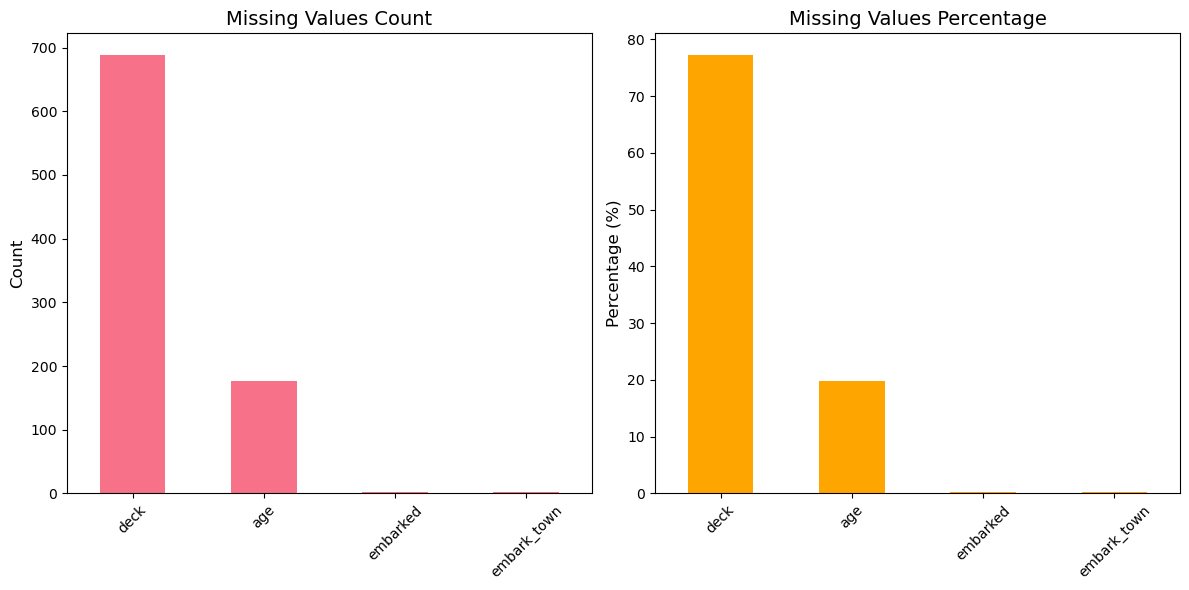


Missing Value Patterns:
Rows with no missing values: 182
Rows with at least one missing value: 709


In [6]:
if not df.empty:
    # Calculate missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage': missing_percentage
    }).sort_values('Missing Count', ascending=False)
    
    print("Missing Values Summary:")
    print(missing_df[missing_df['Missing Count'] > 0])
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_df[missing_df['Missing Count'] > 0]['Missing Count'].plot(kind='bar')
    plt.title('Missing Values Count')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_df[missing_df['Missing Count'] > 0]['Missing Percentage'].plot(kind='bar', color='orange')
    plt.title('Missing Values Percentage')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Missing value patterns
    if missing_values.sum() > 0:
        print("\nMissing Value Patterns:")
        print("Rows with no missing values:", df.notnull().all(axis=1).sum())
        print("Rows with at least one missing value:", df.isnull().any(axis=1).sum())

### 6. Descriptive Statistics

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if not df.empty:
    print("Summary of Numerical Features:")
    display(df[numerical_cols].describe())

    print("\nSummary of Categorical Features:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")

Summary of Numerical Features:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Summary of Categorical Features:

sex:
male      577
female    314
Name: sex, dtype: int64
Unique values: 2

embarked:
S    644
C    168
Q     77
Name: embarked, dtype: int64
Unique values: 3

who:
man      537
woman    271
child     83
Name: who, dtype: int64
Unique values: 3

embark_town:
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Unique values: 3

alive:
no     549
yes    342
Name: alive, dtype: int64
Unique values: 2


### 7. Target Variable Analysis (Survival)

In [16]:
# Analyze survival distribution
if not df.empty and 'survived' in df.columns:
    survival_counts = df['survived'].value_counts()
    survival_rate = df['survived'].mean()
    
    print(f"Survival Counts:")
    print(f"Did not survive (0): {survival_counts[0]}")
    print(f"Survived (1): {survival_counts[1]}")
    print(f"Overall Survival Rate: {survival_rate:.2%}")

Survival Counts:
Did not survive (0): 549
Survived (1): 342
Overall Survival Rate: 38.38%


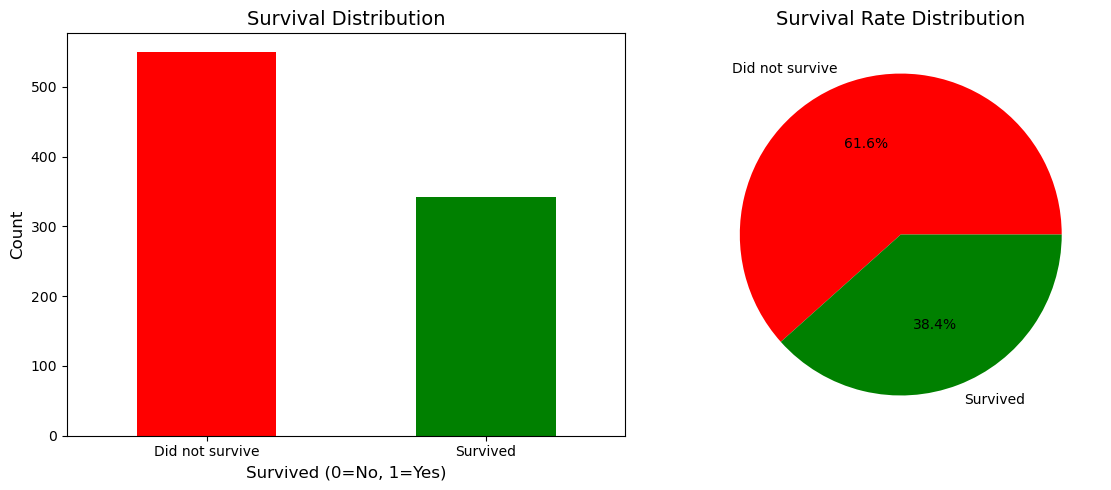

In [18]:
# Visualize survival distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Distribution')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not survive', 'Survived'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(survival_counts.values, labels=['Did not survive', 'Survived'], 
        autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Rate Distribution')

plt.tight_layout()
plt.show()

### 8. Univariate Analysis

Numerical Variables Distribution:


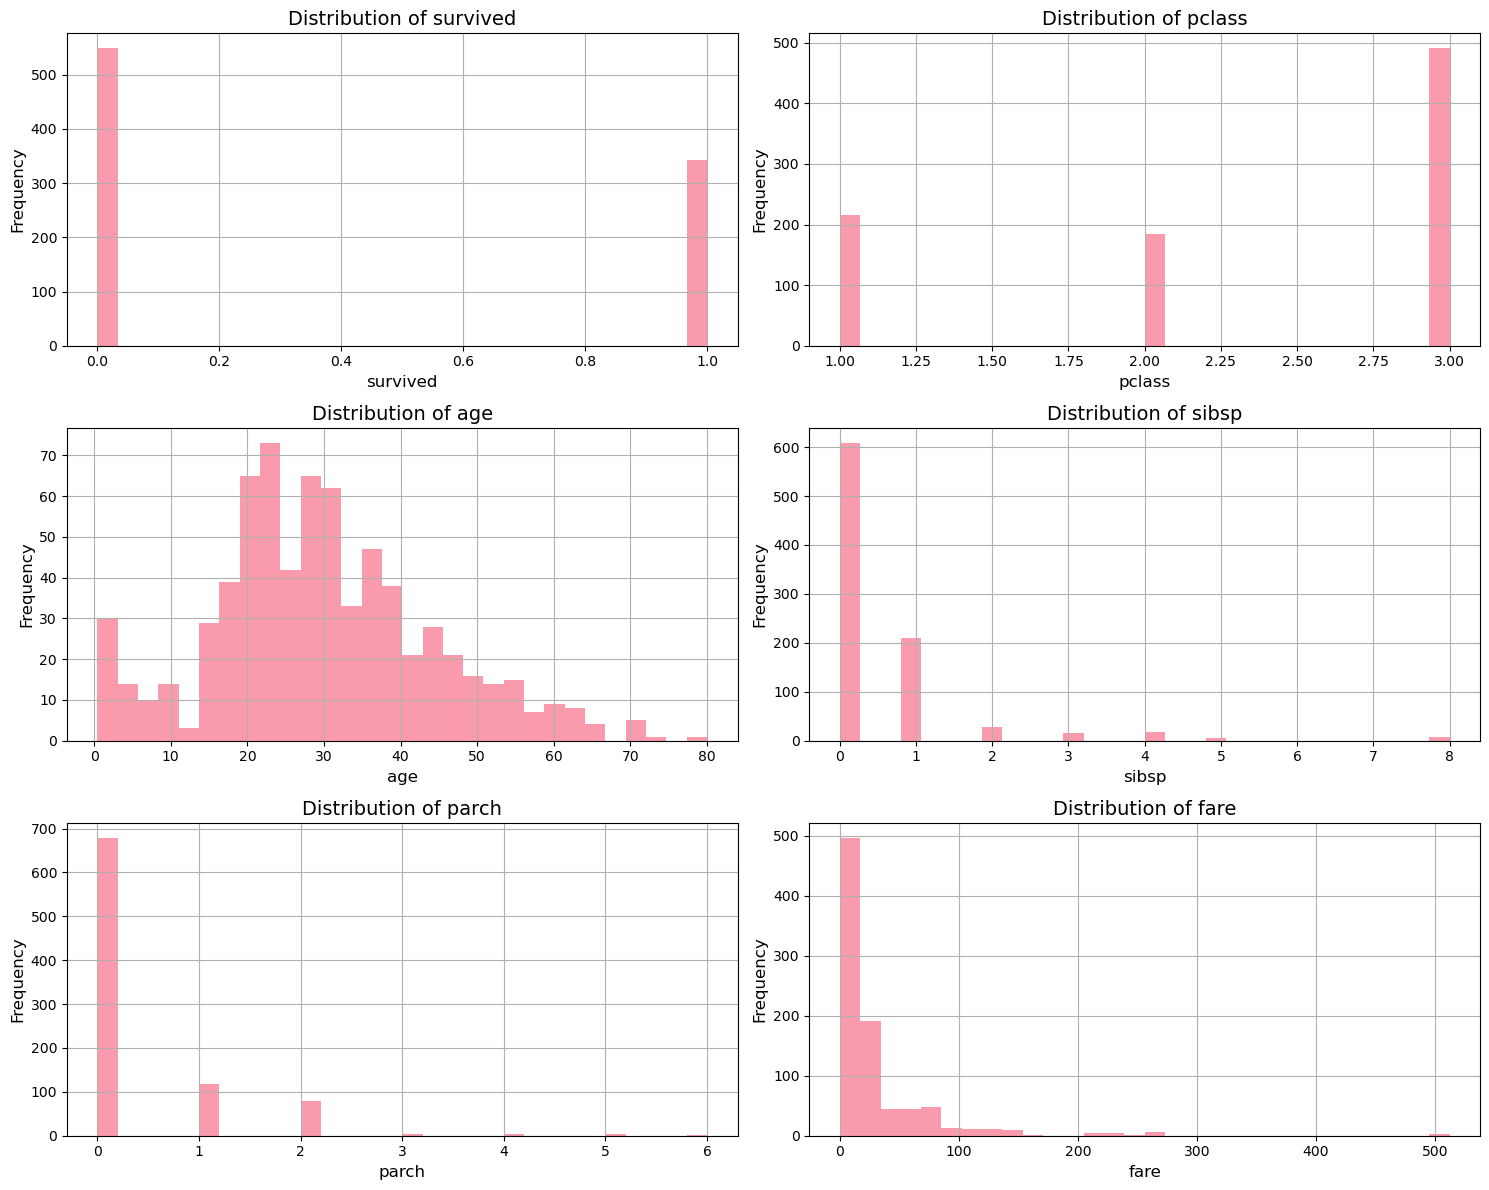


Categorical Variables Distribution:


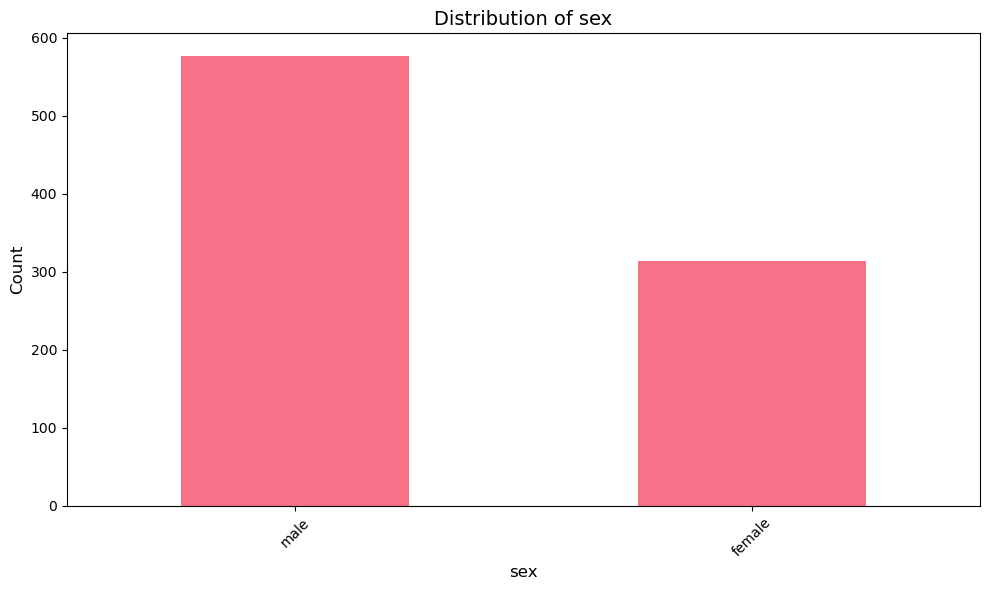

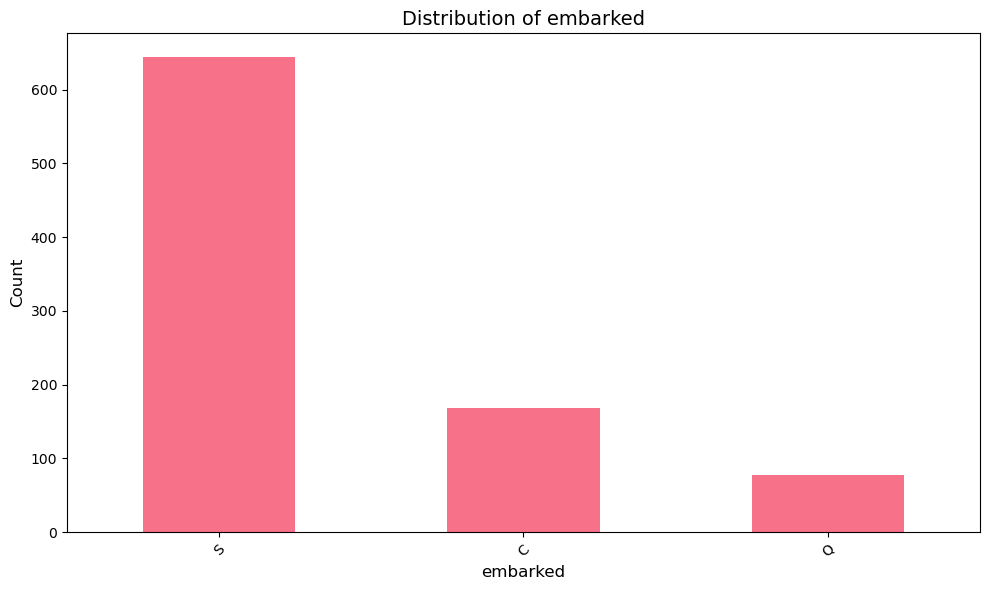

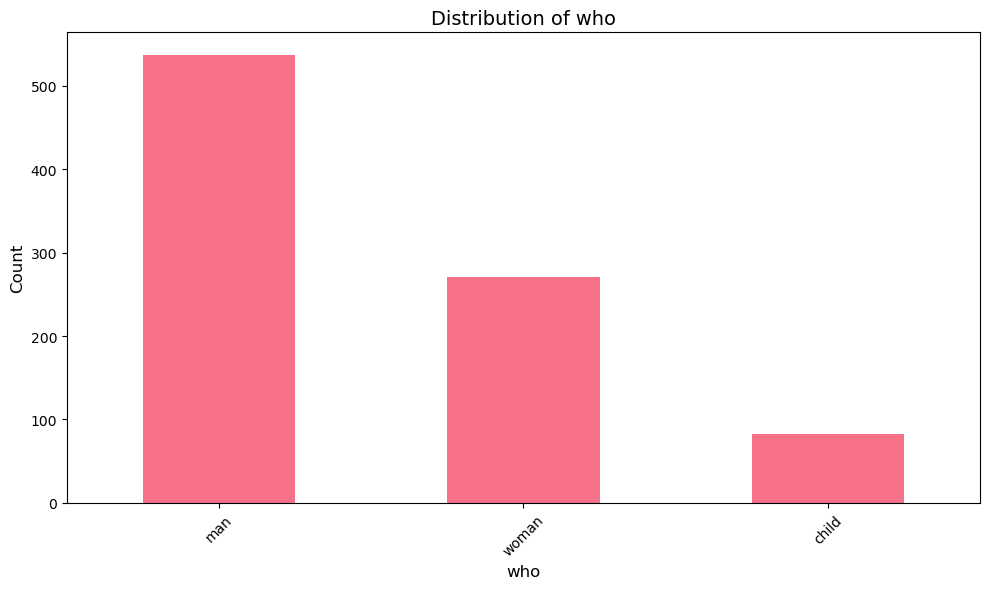

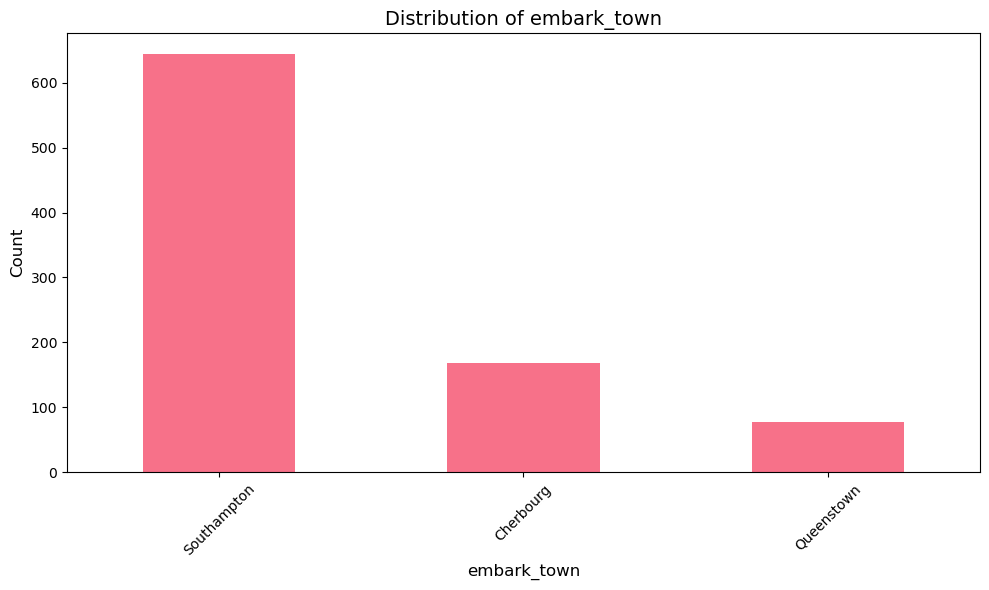

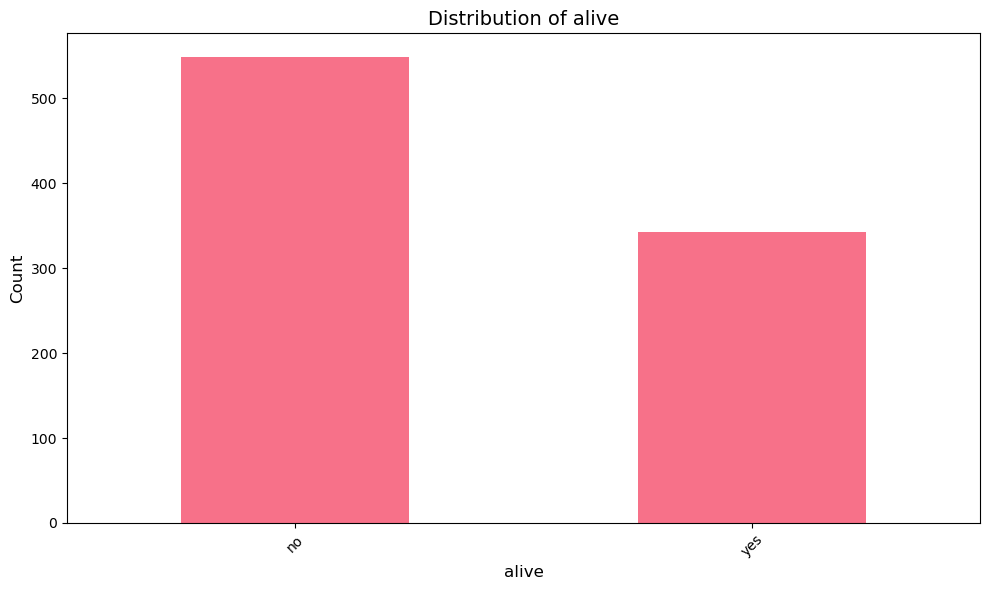

In [19]:
# Numerical variables distribution
if not df.empty:
    # Numerical variables
    if numerical_cols:
        print("Numerical Variables Distribution:")
        n_num_cols = len(numerical_cols)
        fig, axes = plt.subplots((n_num_cols + 1) // 2, 2, figsize=(15, 4 * ((n_num_cols + 1) // 2)))
        axes = axes.flatten() if n_num_cols > 1 else [axes]
        
        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Remove empty subplots
        for i in range(len(numerical_cols), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    # Categorical variables distribution
    if categorical_cols:
        print("\nCategorical Variables Distribution:")
        for col in categorical_cols:
            if df[col].nunique() <= 10:  # Only plot if not too many categories
                plt.figure(figsize=(10, 6))
                df[col].value_counts().plot(kind='bar')
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

### 9. Bivariate Analysis


Survival by sex:
Counts:
survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Survival Rates:
survived         0         1
sex                         
female    0.257962  0.742038
male      0.811092  0.188908


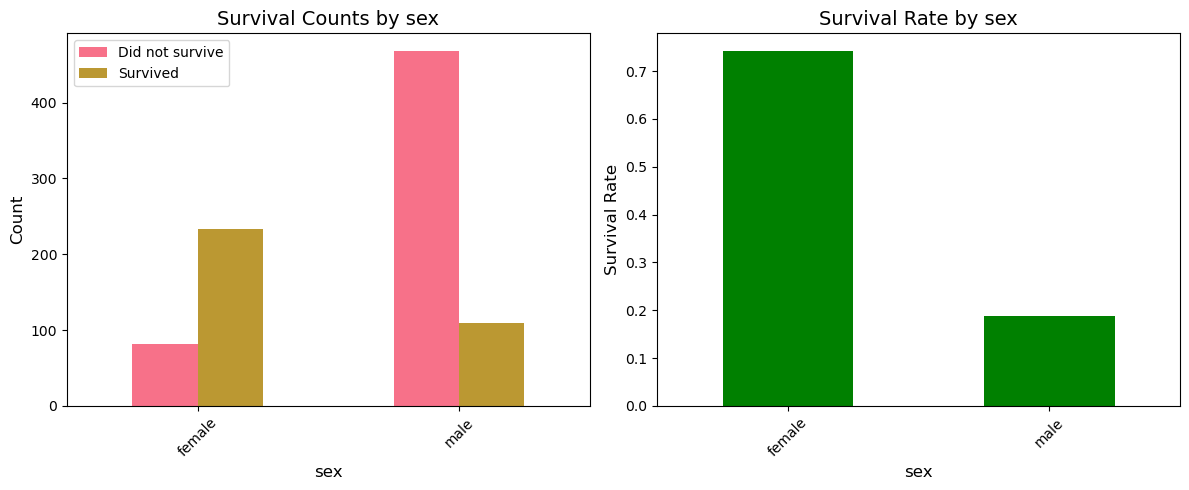


Survival by embarked:
Counts:
survived    0    1  All
embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889

Survival Rates:
survived         0         1
embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


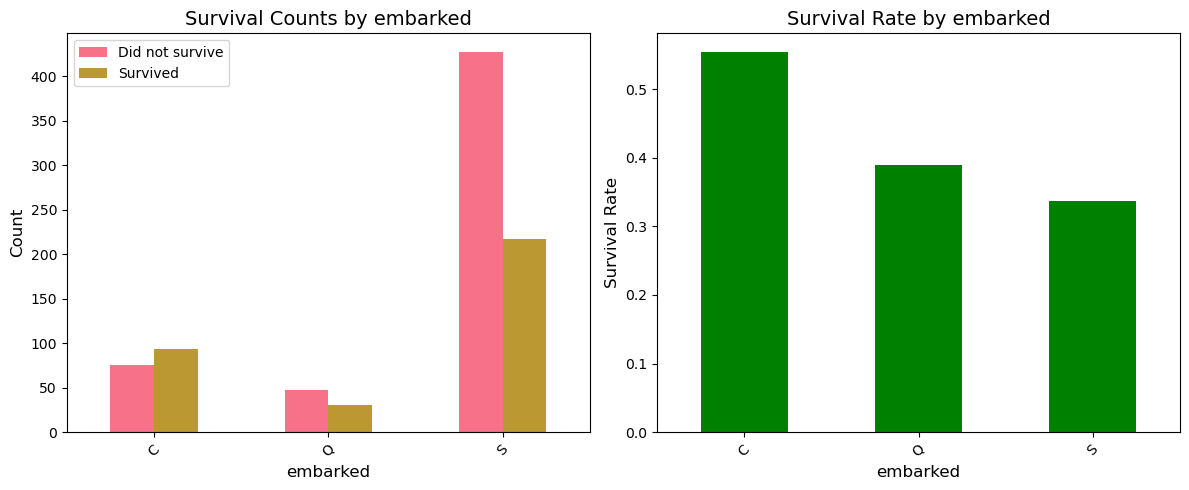


Survival by who:
Counts:
survived    0    1  All
who                    
child      34   49   83
man       449   88  537
woman      66  205  271
All       549  342  891

Survival Rates:
survived         0         1
who                         
child     0.409639  0.590361
man       0.836127  0.163873
woman     0.243542  0.756458


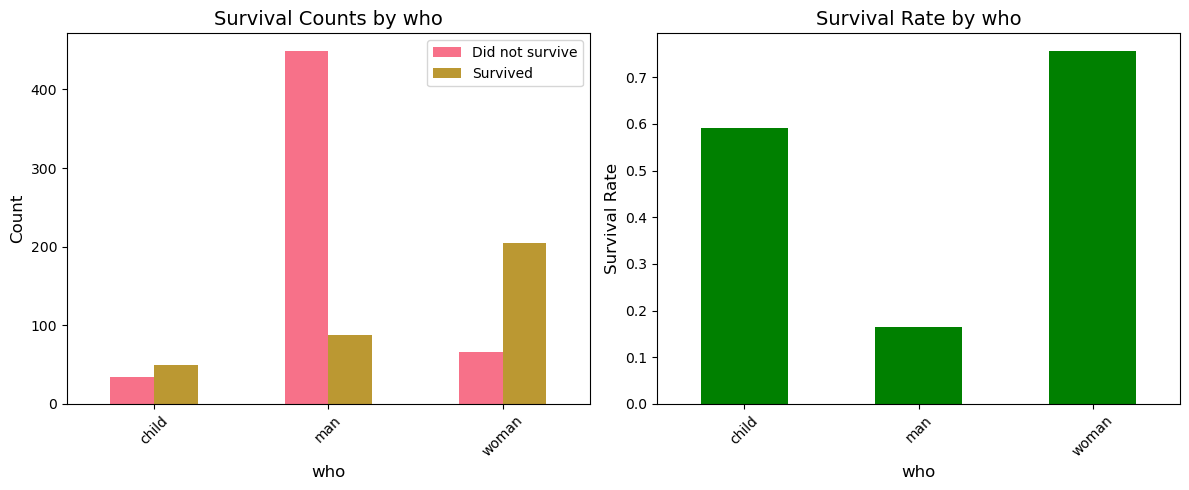


Survival by embark_town:
Counts:
survived       0    1  All
embark_town               
Cherbourg     75   93  168
Queenstown    47   30   77
Southampton  427  217  644
All          549  340  889

Survival Rates:
survived            0         1
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.663043  0.336957


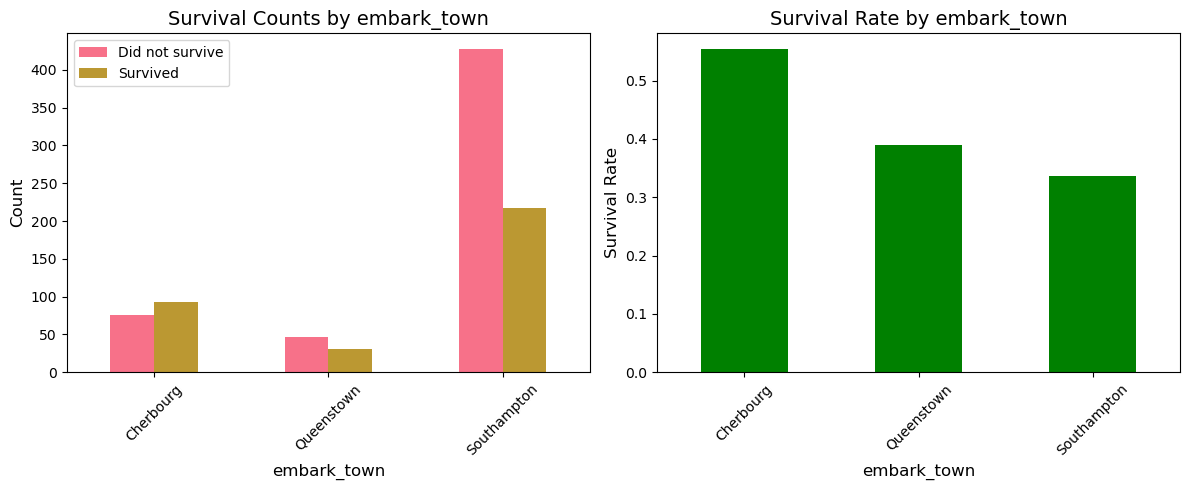


Survival by alive:
Counts:
survived    0    1  All
alive                  
no        549    0  549
yes         0  342  342
All       549  342  891

Survival Rates:
survived    0    1
alive             
no        1.0  0.0
yes       0.0  1.0


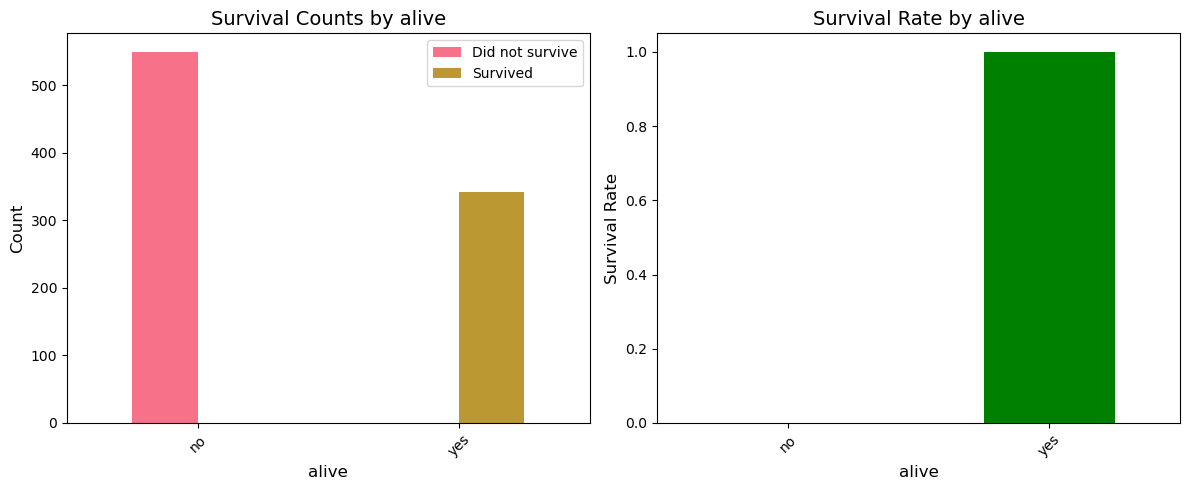

In [21]:
# Survival analysis by categorical variables
if not df.empty and 'survived' in df.columns:

    categorical_analysis_cols = [col for col in categorical_cols if col != 'Name' and df[col].nunique() <= 10]
    
    for col in categorical_analysis_cols:
        if col in df.columns:
            print(f"\nSurvival by {col}:")
            survival_by_cat = pd.crosstab(df[col], df['survived'], margins=True)
            survival_rate_by_cat = pd.crosstab(df[col], df['survived'], normalize='index')
            
            print("Counts:")
            print(survival_by_cat)
            print("\nSurvival Rates:")
            print(survival_rate_by_cat)
            
            # Visualize
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            survival_by_cat.iloc[:-1, :-1].plot(kind='bar', ax=plt.gca())
            plt.title(f'Survival Counts by {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.legend(['Did not survive', 'Survived'])
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2)
            survival_rate_by_cat.iloc[:, 1].plot(kind='bar', color='green', ax=plt.gca())
            plt.title(f'Survival Rate by {col}')
            plt.xlabel(col)
            plt.ylabel('Survival Rate')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()

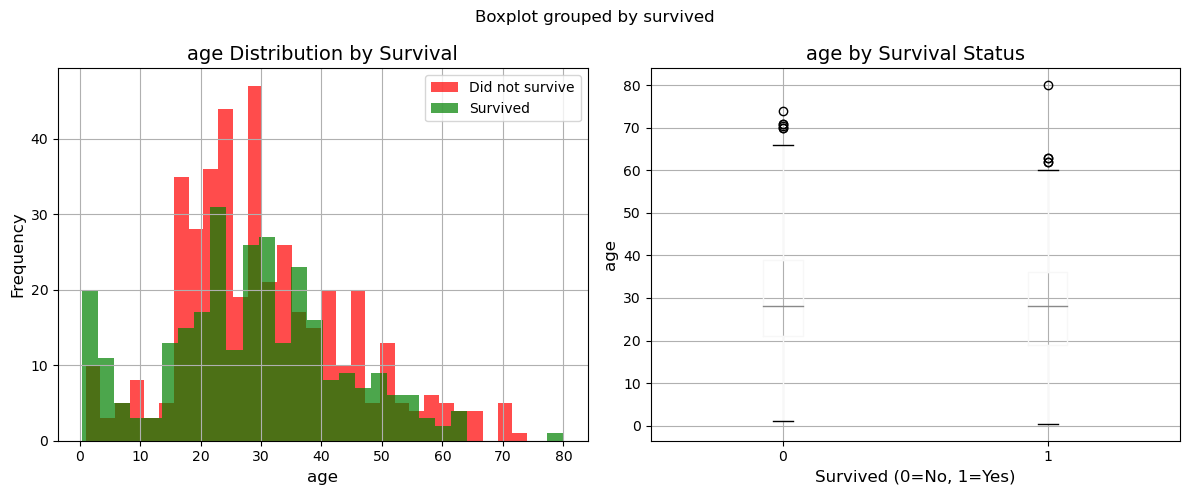

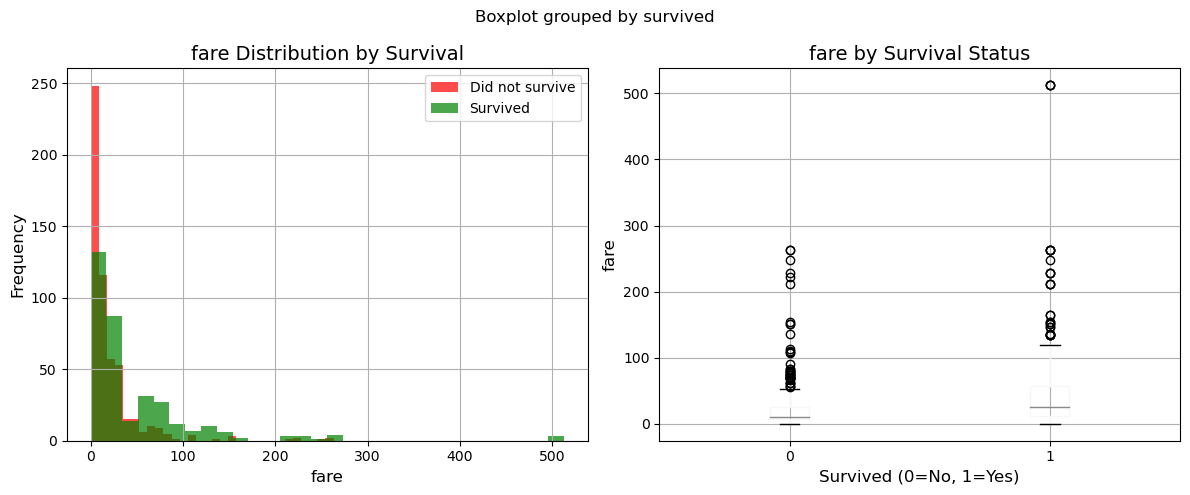

In [25]:
# Survival by numerical variables
if not df.empty and 'survived' in df.columns:
    numerical_survival_cols = ['age', 'fare'] if all(col in df.columns for col in ['age', 'fare']) else []

    for col in numerical_survival_cols:
        if col in df.columns:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            df[df['survived'] == 0][col].hist(alpha=0.7, label='Did not survive', color='red', bins=30)
            df[df['survived'] == 1][col].hist(alpha=0.7, label='Survived', color='green', bins=30)
            plt.title(f'{col} Distribution by Survival')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.legend()

            plt.subplot(1, 2, 2)
            df.boxplot(column=col, by='survived', ax=plt.gca())
            plt.title(f'{col} by Survival Status')
            plt.xlabel('Survived (0=No, 1=Yes)')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()

### 10. Correlation Analysis

Correlation Matrix:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


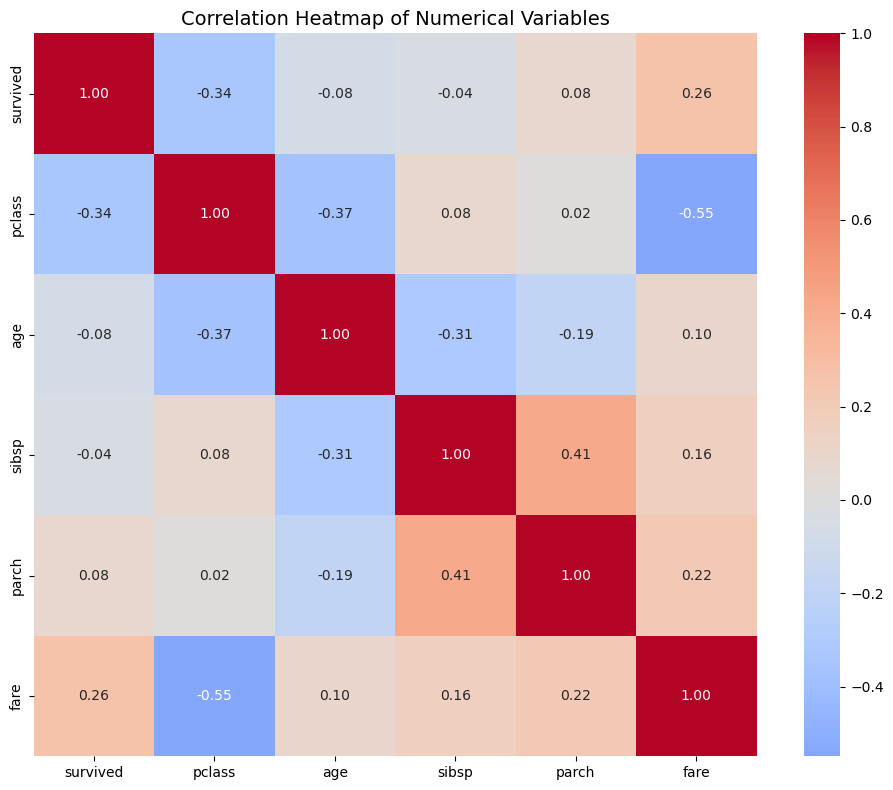


Highly Correlated Variable Pairs (|correlation| > 0.5):
pclass - fare: -0.549


In [26]:
if not df.empty and len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Visualize correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("\nHighly Correlated Variable Pairs (|correlation| > 0.5):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")

### 11. Outlier Detection

Outlier Analysis using IQR method:

survived:
  Lower bound: -1.50
  Upper bound: 2.50
  Number of outliers: 0
  Percentage of outliers: 0.00%

pclass:
  Lower bound: 0.50
  Upper bound: 4.50
  Number of outliers: 0
  Percentage of outliers: 0.00%

age:
  Lower bound: -6.69
  Upper bound: 64.81
  Number of outliers: 11
  Percentage of outliers: 1.23%

sibsp:
  Lower bound: -1.50
  Upper bound: 2.50
  Number of outliers: 46
  Percentage of outliers: 5.16%

parch:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 213
  Percentage of outliers: 23.91%

fare:
  Lower bound: -26.72
  Upper bound: 65.63
  Number of outliers: 116
  Percentage of outliers: 13.02%


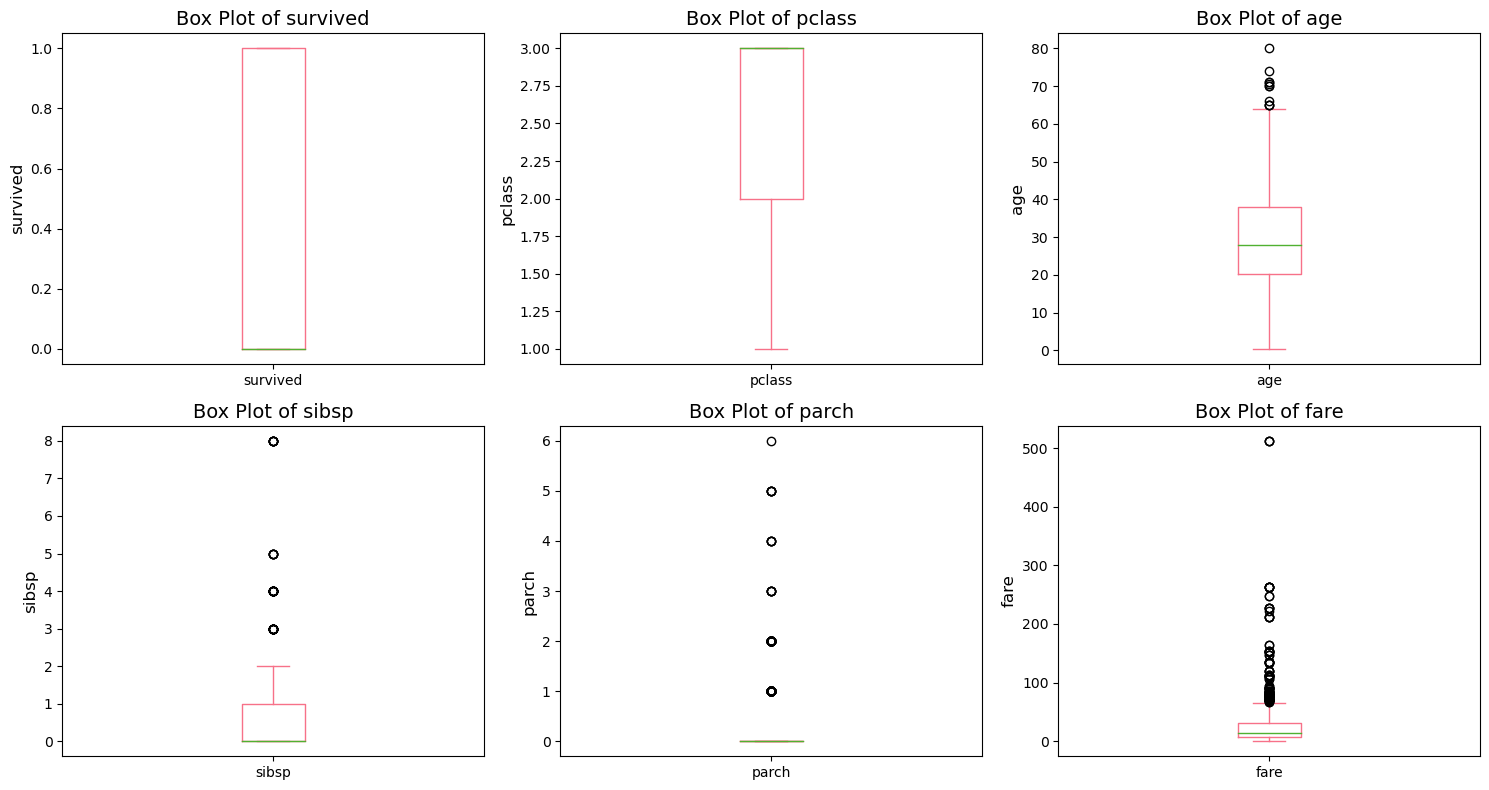

In [27]:
if not df.empty and numerical_cols:
    print("Outlier Analysis using IQR method:")
    
    for col in numerical_cols:
        if col in df.columns and df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            print(f"\n{col}:")
            print(f"  Lower bound: {lower_bound:.2f}")
            print(f"  Upper bound: {upper_bound:.2f}")
            print(f"  Number of outliers: {len(outliers)}")
            print(f"  Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
    
    # Visualize outliers with box plots
    if len(numerical_cols) > 0:
        plt.figure(figsize=(15, 4 * ((len(numerical_cols) + 2) // 3)))
        for i, col in enumerate(numerical_cols, 1):
            if col in df.columns and df[col].dtype in ['int64', 'float64']:
                plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
                df[col].plot(kind='box')
                plt.title(f'Box Plot of {col}')
                plt.ylabel(col)
        
        plt.tight_layout()
        plt.show()

### 12. Feature Engineering Insights

In [29]:
if not df.empty:
    print("Potential Feature Engineering Opportunities:")
    
    # Family size analysis
    if all(col in df.columns for col in ['sibsp', 'parch']):
        df['familysize'] = df['sibsp'] + df['parch'] + 1
        df['isalone'] = (df['familysize'] == 1).astype(int)
        
        print("\n1. Family Size Feature:")
        print(f"   Family size distribution:")
        print(df['familysize'].value_counts().sort_index())
        
        if 'survived' in df.columns:
            print(f"   Survival rate by family size:")
            print(df.groupby('familysize')['survived'].mean().sort_index())
    
    # Title extraction from names
    if 'name' in df.columns:
        df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        print("\n2. Title Feature (from Name):")
        print(f"   Title distribution:")
        print(df['title'].value_counts())
        
        if 'survived' in df.columns:
            print(f"   Survival rate by title:")
            print(df.groupby('title')['survived'].mean().sort_values(ascending=False))
    
    # Age groups
    if 'age' in df.columns:
        df['agegroup'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                               labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
        print("\n3. Age Group Feature:")
        print(f"   Age group distribution:")
        print(df['agegroup'].value_counts())
        
        if 'survived' in df.columns:
            print(f"   Survival rate by age group:")
            print(df.groupby('agegroup')['survived'].mean())


Potential Feature Engineering Opportunities:

1. Family Size Feature:
   Family size distribution:
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: familysize, dtype: int64
   Survival rate by family size:
familysize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

3. Age Group Feature:
   Age group distribution:
Adult          358
Middle-aged    195
Teen            70
Child           69
Senior          22
Name: agegroup, dtype: int64
   Survival rate by age group:
agegroup
Child          0.579710
Teen           0.428571
Adult          0.382682
Middle-aged    0.400000
Senior         0.227273
Name: survived, dtype: float64


### 13. Advanced Insights

In [30]:
if not df.empty and 'survived' in df.columns:
    print("Key Findings:")
    
    # Multi-dimensional analysis
    if all(col in df.columns for col in ['sex', 'pclass']):
        multi_analysis = df.groupby(['sex', 'pclass'])['survived'].agg(['count', 'sum', 'mean'])
        multi_analysis.columns = ['Total', 'Survived', 'Survival_Rate']
        print("\n1. Survival by Sex and Class:")
        print(multi_analysis)
    
    # Statistical tests
    if 'sex' in df.columns:
        from scipy.stats import chi2_contingency
        
        # Chi-square test for independence between Sex and Survival
        contingency_table = pd.crosstab(df['sex'], df['survived'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        print(f"\n2. Statistical Test - Sex vs Survival:")
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   P-value: {p_value:.4f}")
        print(f"   Result: {'Significant' if p_value < 0.05 else 'Not significant'} association")


Key Findings:

1. Survival by Sex and Class:
               Total  Survived  Survival_Rate
sex    pclass                                
female 1          94        91       0.968085
       2          76        70       0.921053
       3         144        72       0.500000
male   1         122        45       0.368852
       2         108        17       0.157407
       3         347        47       0.135447

2. Statistical Test - Sex vs Survival:
   Chi-square statistic: 260.7170
   P-value: 0.0000
   Result: Significant association


### 14. Summary

In [31]:
if not df.empty:
    print("Dataset Summary:")
    print(f"• Total records: {len(df)}")
    print(f"• Total features: {len(df.columns)}")
    print(f"• Missing values: {df.isnull().sum().sum()}")
    
    if 'survived' in df.columns:
        print(f"• Overall survival rate: {df['survived'].mean():.2%}")
    
    print("\nKey Insights:")
    if 'sex' in df.columns and 'survived' in df.columns:
        female_survival = df[df['sex'] == 'female']['survived'].mean()
        male_survival = df[df['sex'] == 'male']['survived'].mean()
        print(f"• Women had {female_survival:.2%} survival rate vs men's {male_survival:.2%}")
    
    if 'pclass' in df.columns and 'survived' in df.columns:
        class_survival = df.groupby('pclass')['survived'].mean()
        print(f"• First class passengers had the highest survival rate")

print("\n" + "=" * 80)
print("EXPLORATORY DATA ANALYSIS COMPLETED")
print("=" * 80)

Dataset Summary:
• Total records: 891
• Total features: 18
• Missing values: 1046
• Overall survival rate: 38.38%

Key Insights:
• Women had 74.20% survival rate vs men's 18.89%
• First class passengers had the highest survival rate

EXPLORATORY DATA ANALYSIS COMPLETED
